# Analiza średnich temperatur dziennych w Madrycie

średnich temperatur dziennych analiza madrycka

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

## Przygotowanie danych

In [18]:
data_path_madrid = 'madrid.csv'
madrid_data = pd.read_csv(data_path_madrid)

madrid_data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Europe,Spain,NaN,Madrid,5,13,2017,61.0
1,Europe,Spain,NaN,Madrid,5,14,2017,63.2
2,Europe,Spain,NaN,Madrid,5,15,2017,66.8
3,Europe,Spain,NaN,Madrid,5,16,2017,73.7
4,Europe,Spain,NaN,Madrid,5,17,2017,72.3


Na tym etapie stwierdzamy, że `Region`, `Country` i `State` nie są nam potrzebne

In [19]:
madrid_data = madrid_data.drop('Region', axis=1)
madrid_data = madrid_data.drop('Country', axis=1)
madrid_data = madrid_data.drop('State', axis=1)

madrid_data

,City,Month,Day,Year,AvgTemperature
0,Madrid,5,13,2017,61.0
1,Madrid,5,14,2017,63.2
2,Madrid,5,15,2017,66.8
3,Madrid,5,16,2017,73.7
4,Madrid,5,17,2017,72.3
...,...,...,...,...,...
1092,Madrid,5,9,2020,67.0
1093,Madrid,5,10,2020,60.1
1094,Madrid,5,11,2020,60.6
1095,Madrid,5,12,2020,55.3


`Month`, `Day`, `Year` i `AvgTemperature` to liczby

In [20]:
madrid_data["Month"] = pd.to_numeric(madrid_data["Month"])
madrid_data["Day"] = pd.to_numeric(madrid_data["Day"])
madrid_data["Year"] = pd.to_numeric(madrid_data["Year"])
madrid_data["AvgTemperature"] = pd.to_numeric(madrid_data["AvgTemperature"])

Coś tam z datą 

In [21]:
madrid_data['Date'] = pd.to_datetime(madrid_data[['Year', 'Month', 'Day']])

madrid_data = madrid_data.sort_values(by='Date')

madrid_data

,City,Month,Day,Year,AvgTemperature,Date
0,Madrid,5,13,2017,61.0,2017-05-13
1,Madrid,5,14,2017,63.2,2017-05-14
2,Madrid,5,15,2017,66.8,2017-05-15
3,Madrid,5,16,2017,73.7,2017-05-16
4,Madrid,5,17,2017,72.3,2017-05-17
...,...,...,...,...,...,...
1092,Madrid,5,9,2020,67.0,2020-05-09
1093,Madrid,5,10,2020,60.1,2020-05-10
1094,Madrid,5,11,2020,60.6,2020-05-11
1095,Madrid,5,12,2020,55.3,2020-05-12


Zobaczmy jak dane się prezentują na wykresie

C:\Users\matio\AppData\Local\Temp\ipykernel_2652\2542325190.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


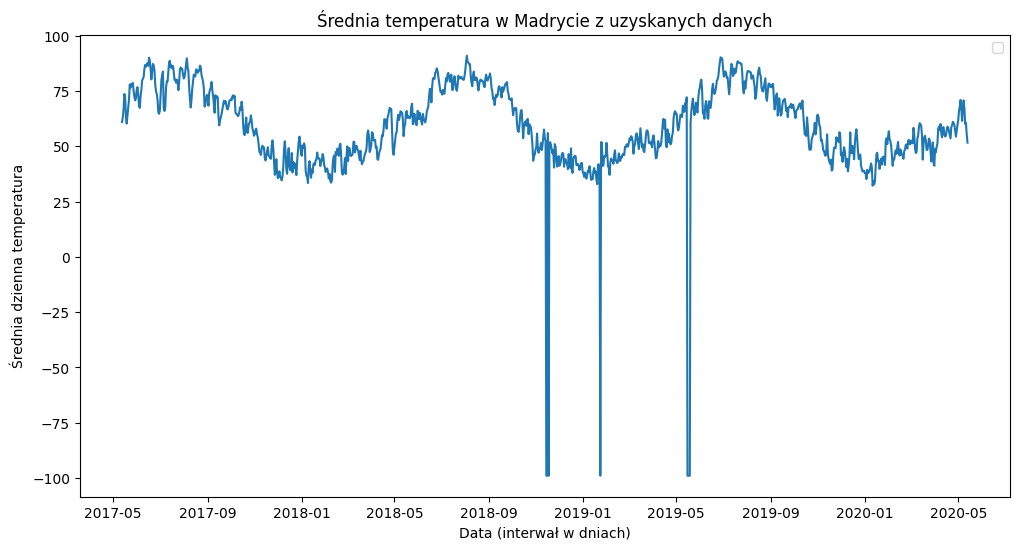

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(madrid_data['Date'], madrid_data['AvgTemperature'])

plt.title('Średnia temperatura w Madrycie z uzyskanych danych')

plt.xlabel('Data (interwał w dniach)')
plt.ylabel('Średnia dzienna temperatura')

plt.legend()
plt.show()

### Brakujące wartości

Widzimy teraz pewne problemy. W uzyskanych danych badacze nie zmierzeli danych dla wybranych konkretnych przypadkowych dni co powoduje problem.

Dodatkowo temperatura jest prawdopodobnie w Farenheitach 

In [23]:
madrid_data[madrid_data.AvgTemperature < -75].head()

,City,Month,Day,Year,AvgTemperature,Date
550,Madrid,11,14,2018,-99.0,2018-11-14
551,Madrid,11,15,2018,-99.0,2018-11-15
553,Madrid,11,17,2018,-99.0,2018-11-17
620,Madrid,1,23,2019,-99.0,2019-01-23
733,Madrid,5,16,2019,-99.0,2019-05-16


hahahhahhahahahhah

Potwierdza się hipoteza, `-99` to wartość kiedy prawdopodobnie temp. nie została zmierzona bo mija się to z prawdą. Zmienimy je na średnią z 5 sasiądujących dni.
`brakujący dzień = 1/4 (-2 dzień + -1 dzień + +1 dzień + +2dzień)`

In [24]:
madrid_data['AvgTemperature_New'] = madrid_data['AvgTemperature']

for i in range(len(madrid_data)):
    if madrid_data.at[i, 'AvgTemperature'] == -99.0:
        start_index = max(0, i - 2)
        end_index = min(len(madrid_data), i + 2)
        neighbors = madrid_data['AvgTemperature'].loc[start_index:end_index]
        neighbors_without_minus_99 = neighbors[neighbors != -99.0]
        madrid_data.at[i, 'AvgTemperature_New'] = round(neighbors_without_minus_99.mean(), 2)

madrid_data['AvgTemperature'] = madrid_data['AvgTemperature_New']
madrid_data = madrid_data.drop('AvgTemperature_New', axis=1)

madrid_data[madrid_data.AvgTemperature < -75].head()

,City,Month,Day,Year,AvgTemperature,Date


Puste wiersze z złymi danymi => więc się zgadza. 

Zobaczmy wykres po tych modyfikacjach

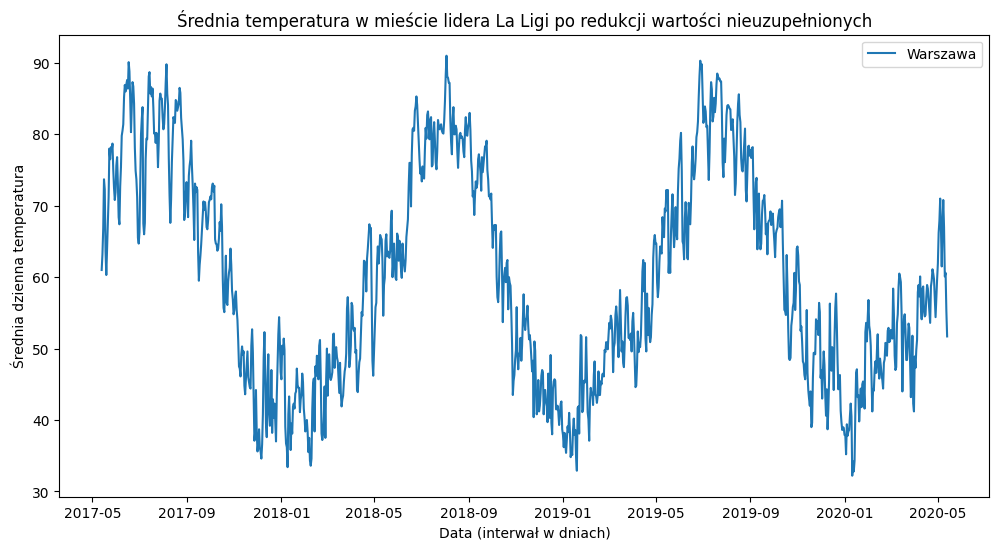

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(madrid_data['Date'], madrid_data['AvgTemperature'])

plt.title('Średnia temperatura w mieście lidera La Ligi po redukcji wartości nieuzupełnionych')

plt.xlabel('Data (interwał w dniach)')
plt.ylabel('Średnia dzienna temperatura')

plt.legend()
plt.show()

### Konwersja stopni

Wartości są mniej niepokojące, jednak 90 stopni nie jest możliwe. Zauważmy że $100$ stopni Farenheita to $37.7$ Celcjusza co miałoby większy sens ale maksimum.

Wzór konwersji z Farenheita na Celsjusza to:
$$
(F - 32) \cdot \frac{5}{9}
$$

In [27]:
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * (5/9)


madrid_data['AvgTemperature'] = madrid_data['AvgTemperature'].apply(fahrenheit_to_celsius)

Ponownie spójrzmy na wykres

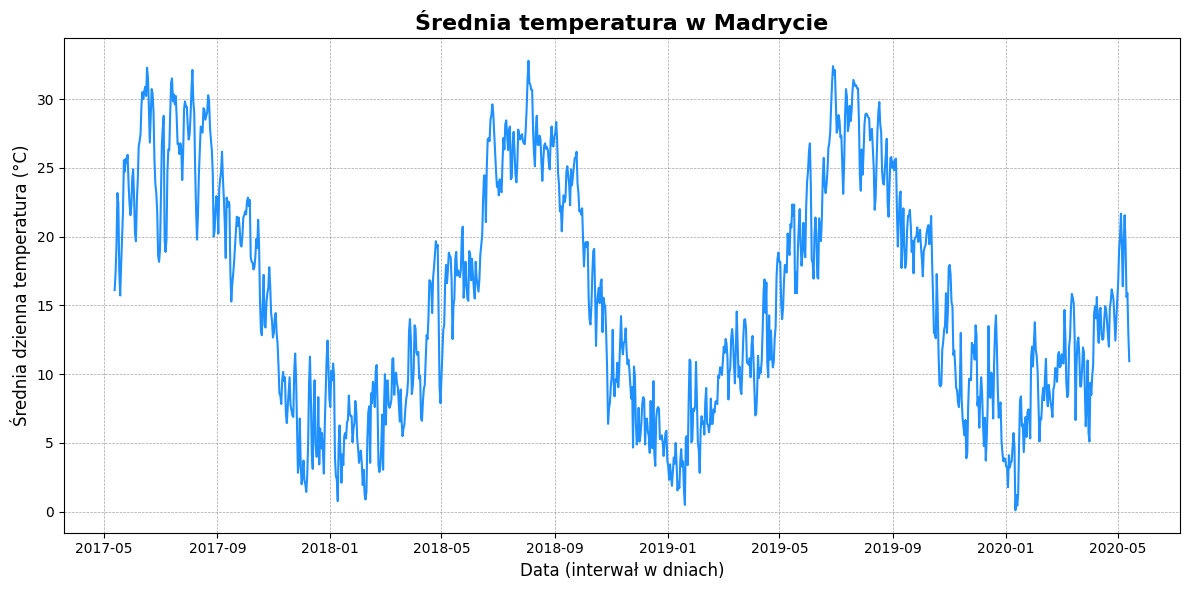

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(madrid_data['Date'], madrid_data['AvgTemperature'], color='dodgerblue', linewidth=1.5)

plt.title('Średnia temperatura w Madrycie', fontsize=16, fontweight='bold')

plt.xlabel('Data (interwał w dniach)', fontsize=12)
plt.ylabel('Średnia dzienna temperatura (°C)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

Takie dane wyglądają jak najbadziej sensownie i realnie - mamy więc z czym pracować.